# Imports

In [3]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import polars as pl
import requests as r
import textwrap
import random
import time
import json

# Import data

Download the parquet file from [mempool-dumpster.flashbots.net/ethereum/mainnet/2023-09](https://mempool-dumpster.flashbots.net/ethereum/mainnet/2023-09/index.html) and save it in a directory of your choice. I called mine "data".

Load the data by reading the parquet file into a polars dataframe.

The dataframe contains 1,009,333 rows and 18 columns. The column names are: 'timestamp', 'hash', 'chainId', 'from', 'to', 'value', 'nonce', 'gas', 'gasPrice', 'gasTipCap', 'gasFeeCap', 'dataSize', 'data4Bytes', 'sources', 'includedAtBlockHeight', 'includedBlockTimestamp', 'inclusionDelayMs' and 'rawTx'

In [4]:
df = pl.read_parquet("./data/2023-09-01.parquet")
print(df.shape)
print(df.columns)
df.head()

(1009333, 18)
['timestamp', 'hash', 'chainId', 'from', 'to', 'value', 'nonce', 'gas', 'gasPrice', 'gasTipCap', 'gasFeeCap', 'dataSize', 'data4Bytes', 'sources', 'includedAtBlockHeight', 'includedBlockTimestamp', 'inclusionDelayMs', 'rawTx']


timestamp,hash,chainId,from,to,value,nonce,gas,gasPrice,gasTipCap,gasFeeCap,dataSize,data4Bytes,sources,includedAtBlockHeight,includedBlockTimestamp,inclusionDelayMs,rawTx
datetime[ms],str,str,str,str,str,str,str,str,str,str,i64,str,list[str],i64,datetime[ms],i64,binary
2023-09-01 00:00:00.132,"""0x7cac573db9b0…","""1""","""0xe6b69d0e8a62…","""0xed5af3886535…","""0""","""168""","""46189""","""17224188704""","""100000000""","""17224188704""",68,"""0xa22cb465""","[""local"", ""bloxroute"", … ""infura""]",18037988,2023-09-01 00:00:11,10868,[binary data]
2023-09-01 00:00:00.153,"""0x7b6a82fd7718…","""1""","""0x6081258689a7…","""0xef07ffdc164f…","""60773088475430…","""617565""","""21000""","""18005838005""","""1000000000""","""18005838005""",0,"""""","[""local"", ""bloxroute"", … ""infura""]",18037988,2023-09-01 00:00:11,10847,[binary data]
2023-09-01 00:00:00.171,"""0x1092255114a2…","""1""","""0x049ea15303af…","""0x049ea15303af…","""0""","""11""","""227706""","""38365701179""","""110000000""","""38365701179""",0,"""""","[""bloxroute""]",18038038,2023-09-01 00:10:11,610829,[binary data]
2023-09-01 00:00:00.184,"""0xbe338f09ba3f…","""1""","""0xcac0f1a06d3f…","""0x7776607e2e0b…","""68018357315548…","""455""","""108177""","""22399069949""","""3000000000""","""22399069949""",452,"""0xb9e9a5ef""","[""bloxroute"", ""local"", … ""infura""]",18037988,2023-09-01 00:00:11,10816,[binary data]
2023-09-01 00:00:00.243,"""0xbb56020e9707…","""1""","""0xf93bd92f8502…","""0xa0b86991c621…","""0""","""3""","""60376""","""18073064934""","""100000000""","""18073064934""",68,"""0x095ea7b3""","[""local"", ""bloxroute"", … ""infura""]",18037988,2023-09-01 00:00:11,10757,[binary data]


# What are the most called functions?

Let's find out what are the most called function selectors. There is a column called **data4Bytes** with the 4 byte identifier of a function, but the names of the identifier are not present in this dataset, so we will have to figure out what does each one resolve to.

Lets start by separating our target column from the rest of the dataset.

In [4]:
bytes = df.select(pl.col("data4Bytes"))
print(bytes.shape)
bytes.head()

(1009333, 1)


data4Bytes
str
"""0xa22cb465"""
""""""
""""""
"""0xb9e9a5ef"""
"""0x095ea7b3"""


Now we have 1 column with 1,009,333 rows. It is very likely that some function selectors are called multiple times, so it makes sense finding out how many of those are repeated to aggregate them together.

In [5]:
bytes = bytes.group_by("data4Bytes").agg(pl.count("data4Bytes").alias("count"))
# Sort by the most seen selector
bytes = bytes.sort("count", descending=True)
print(bytes.shape)
bytes.head()

(10509, 2)


data4Bytes,count
str,u32
"""""",354661
"""0xa9059cbb""",183054
"""0x095ea7b3""",77012
"""0x3593564c""",70295
"""0xe2bbb158""",12284


After aggregating and sorting, we have reduced the amount of rows to 10,509, effectively getting rid of 1,009,333 - 10,509 = **998,824** rows!

This is great, we have a dataframe with all the function selectors that were spotted in the mempool and the amount of times that each one has been seen. But how do we resolve their names? 

## Fetching function selector names

[4byte.directory](https://www.4byte.directory/) is our best friend here! An alternative is using [etk-4byte](https://github.com/quilt/etk/tree/master/etk-4byte) and download the database using rust.

```rust
$ cd etk-4byte
$ cargo install
$ cargo run --features=generate --bin etk-4byte-generate > src/signatures.txt
```

For this case the 4byte directory API is enough.

### Using the 4byte.directory API 

In [6]:
url = "https://www.4byte.directory/api/v1/signatures/?hex_signature=0xa9059cbb"
response = r.get(url) 
result = json.loads(response.text)
result

{'count': 5,
 'next': None,
 'previous': None,
 'results': [{'id': 844280,
   'created_at': '2022-08-26T12:20:41.369990Z',
   'text_signature': 'join_tg_invmru_haha_fd06787(address,bool)',
   'hex_signature': '0xa9059cbb',
   'bytes_signature': '©\x05\x9c»'},
  {'id': 313067,
   'created_at': '2021-10-20T05:29:13.555535Z',
   'text_signature': 'func_2093253501(bytes)',
   'hex_signature': '0xa9059cbb',
   'bytes_signature': '©\x05\x9c»'},
  {'id': 161159,
   'created_at': '2019-03-22T19:13:17.314877Z',
   'text_signature': 'transfer(bytes4[9],bytes5[6],int48[11])',
   'hex_signature': '0xa9059cbb',
   'bytes_signature': '©\x05\x9c»'},
  {'id': 31780,
   'created_at': '2018-05-11T08:39:29.708250Z',
   'text_signature': 'many_msg_babbage(bytes1)',
   'hex_signature': '0xa9059cbb',
   'bytes_signature': '©\x05\x9c»'},
  {'id': 145,
   'created_at': '2016-07-09T03:58:28.234977Z',
   'text_signature': 'transfer(address,uint256)',
   'hex_signature': '0xa9059cbb',
   'bytes_signature': '©\x0

Extract the text signature from the results.

In [7]:
length = result["count"]
for i in range(length):
    print(result["results"][i]["text_signature"])

join_tg_invmru_haha_fd06787(address,bool)
func_2093253501(bytes)
transfer(bytes4[9],bytes5[6],int48[11])
many_msg_babbage(bytes1)
transfer(address,uint256)


Now that we know how to extract the text signature, lets make a function to retrieve it and iterate through all the rows.

In [ ]:
def get_sig(signature):
    res = r.get(f"https://www.4byte.directory/api/v1/signatures/?hex_signature={signature}")
    result = json.loads(res.text)
    count = result["count"]
    if count > 0:
        text_signature = ", ".join([res["text_signature"] for res in result["results"]])
        return text_signature
    else:
        text_signature = None
        return text_signature

selector_name = []
c = 0
start = time.time()
for row in bytes.iter_rows():
    if row[0] == "":
        selector_name.append("No Selector")
        print(f"{c}: No selector")
    else:
        name = get_sig(row[0])
        selector_name.append(name)
        print(f"{c}: Retrieved {name}")
    c += 1
    
end = time.time()
print(f"Execution time: {(end - start) / 3600} hours") # Execution time: 1.1122511861721676 hours

#### Output example
```
0: No selector

1: Retrieved join_tg_invmru_haha_fd06787(address,bool), func_2093253501(bytes), transfer(bytes4[9],bytes5[6],int48[11]), many_msg_babbage(bytes1), transfer(address,uint256)

2: Retrieved _SIMONdotBLACK_(int8[],int224[],int256,int64,uint248[]), watch_tg_invmru_2f69f1b(address,address), sign_szabo_bytecode(bytes16,uint128), approve(address,uint256)

3: Retrieved execute(bytes,bytes[],uint256)

4: Retrieved deposit(uint256,uint256)

5: Retrieved requestL2Transaction(address,uint256,bytes,uint256,uint256,bytes[],address)

6: Retrieved niceFunctionHerePlzClick943230089(address,bool), setApprovalForAll(address,bool)

7: Retrieved depositTransaction(address,uint256,uint64,bool,bytes)

8: Retrieved join_tg_invmru_haha_9f4805a(bool,uint256), swapExactETHForTokensSupportingFeeOnTransferTokens(uint256,address[],address,uint256)

9: Retrieved _SIMONdotBLACK_(int16,uint168,bytes10[],bool,uint40[]), join_tg_invmru_haha_2e12539(bool,uint256,address), swapExactTokensForETHSupportingFeeOnTransferTokens(uint256,uint256,address[],address,uint256)

10: Retrieved ripoffSwap_SfGuec(bytes), swap(string,address,uint256,bytes)

11: Retrieved None

etc ..
```

Create a data frame with the collected selectors and save it as a parquet file for future use.

In [ ]:
selector_df = pl.DataFrame({
    "Name": selector_name
})
sel_df.write_parquet("./data/selector_names.parquet")

In [12]:
selector_df = pl.read_parquet('./data/selector_names.parquet')
# concatenate the selector_df to the original bytes data frame horizontally
fourbytes_df = bytes.hstack(selector_df)
# first 10 rows
first_ten = fourbytes_df.slice(0, 10)
first_ten

data4Bytes,count,Selector Name
str,u32,str
"""""",354661,"""NaN"""
"""0xa9059cbb""",183054,"""join_tg_invmru…"
"""0x095ea7b3""",77012,"""_SIMONdotBLACK…"
"""0x3593564c""",70295,"""execute(bytes,…"
"""0xe2bbb158""",12284,"""deposit(uint25…"
"""0xeb672419""",10545,"""requestL2Trans…"
"""0xa22cb465""",9241,"""niceFunctionHe…"
"""0xe9e05c42""",9034,"""depositTransac…"
"""0xb6f9de95""",8438,"""join_tg_invmru…"


Adjust the "Selector Name" text width"(otherwise the chart will become unreadable) and plot it. "Y" axis with function selector names and "X" axis with the amount of times that selector has been seen in the mempool.

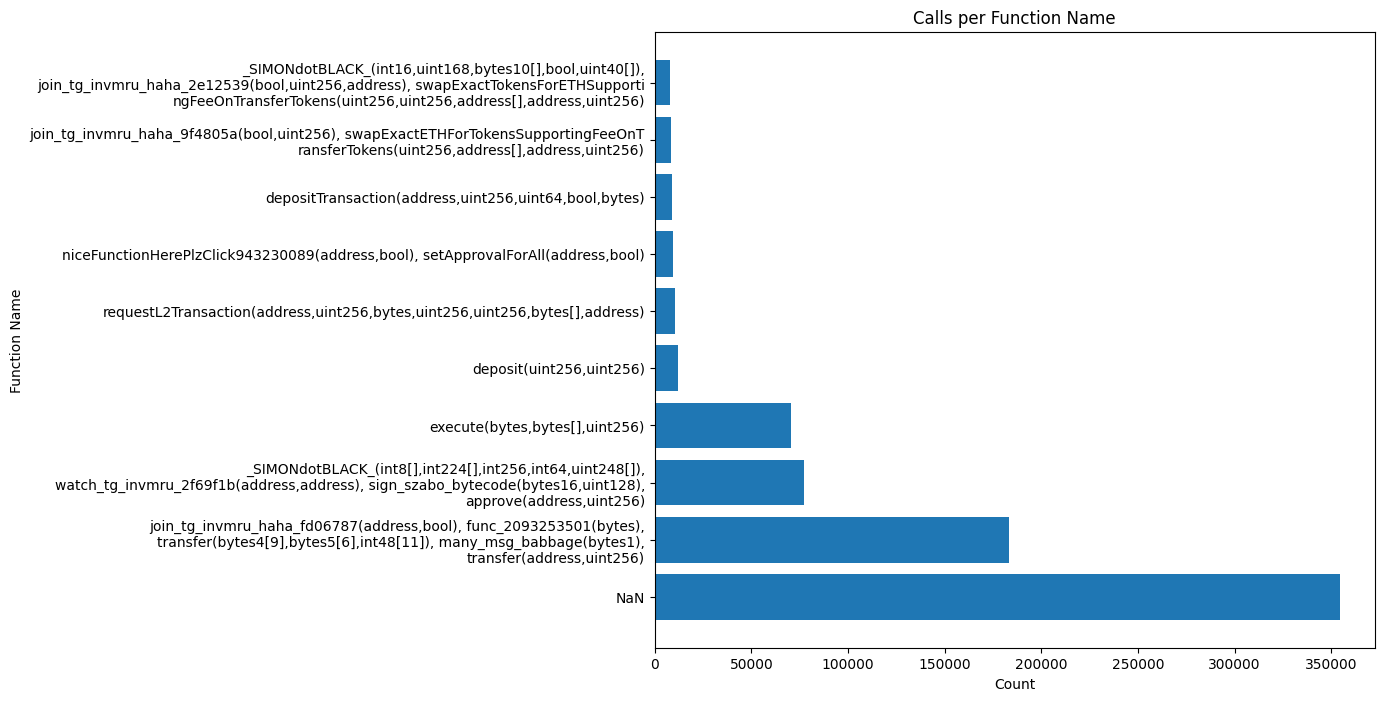

In [15]:
# Wrap long texts in the 'Selector Name' column
max_width = 80
wrapped_names = [textwrap.fill(name, max_width) for name in first_ten["elector Name"]]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(wrapped_names, first_ten["count"])

# Set y-tick locations and their labels
ax.set_yticks(range(len(wrapped_names)))
ax.set_yticklabels(wrapped_names, rotation=0, ha="right")

ax.set_xlabel("Count")
ax.set_ylabel("Function Name")
ax.set_title("Calls per Function Name")

plt.subplots_adjust(left=0.3, right=0.9)
plt.savefig("./data/function_names_plot.png", bbox_inches="tight")
plt.show()

## The most called functions are...

We have sorted the most called function signatures, matched them to their (assumed) function name and graphed the 10 most called functions:
- **1**: No function selector ("") called `354,661` times.
- **2**: `transfer(address,uint256)` (0xa9059cbb) called `183,054` times.
- **3**: `approve(address,uint256)` (0x095ea7b3) called `77,012` times.
- **4**: `execute(bytes, bytes[],uint256)` (0x3593564c) called `70,295` times.
- **5**: `deposit(uint256,uint256)` (0xe2bbb158) called `12,284` times.
- **6**: `requestL2Transaction(address,uint256,bytes,uint256,uint256,bytes[],address)` (0xeb672419) called `10,545` times.
- **7**: `setApprovalForAll(address,bool)` (0xa22cb465) called `9,241` times.
- **8**: `depositTransaction(address,uint256,uint64,bool,bytes)` (0xe9e05c42) called `9,034` times.
- **9**: `swapExactETHForTokensSupportingFeeOnTransferTokens(uint256,address[],address,uint256)` (0xb6f9de95) called `8,438` times.
- **10**: `swapExactTokensForETHSupportingFeeOnTransferTokens(uint256,uint256,address[],address,uint256)` (0x791ac947) called `7,726` times.
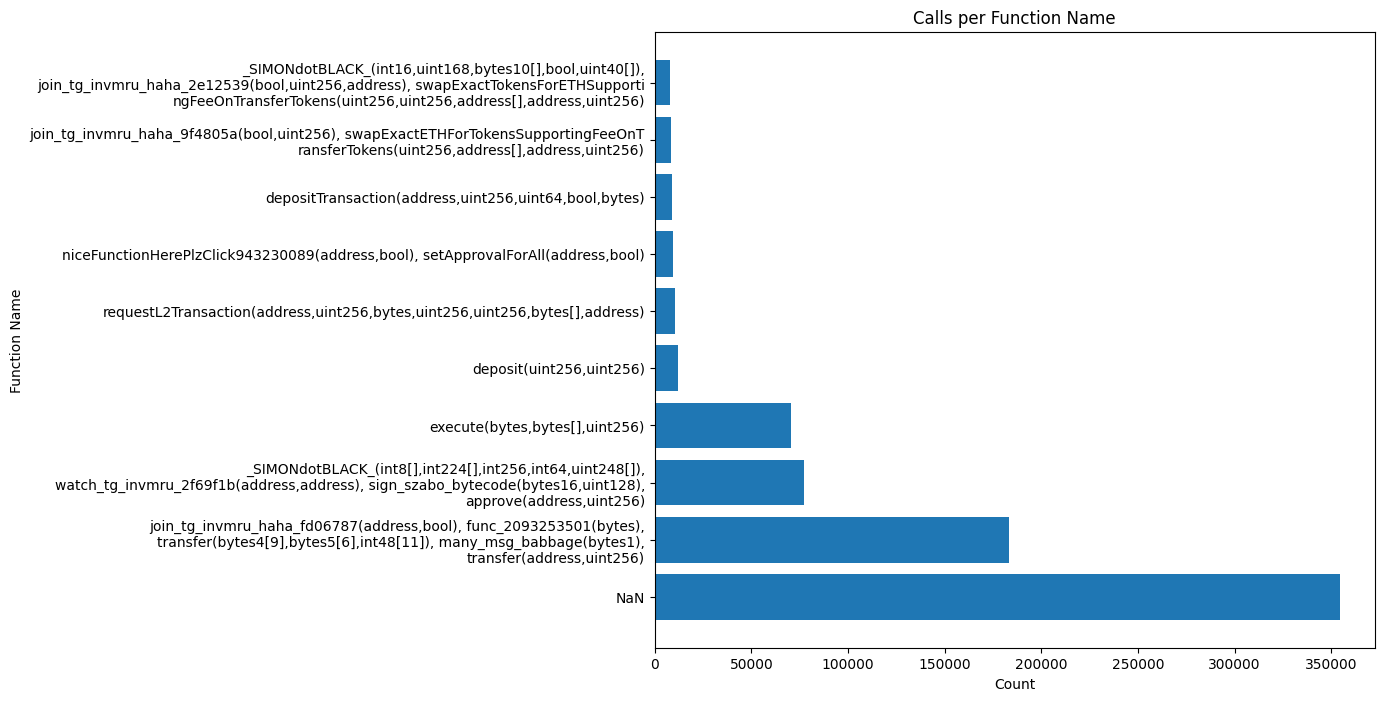


# What are the most called addresses?

We want to know which addresses are interacted with the most. Start by selecting the 'to' column and sort it by the number of times such an address has been seen in the mempool.

In [7]:
data = df.select(pl.col("to"))
print(data.shape)
addresses = data.group_by("to").agg(pl.count("to").alias("count"))
addresses = addresses.sort("count", descending=True)
print(addresses.shape)
addresses.head()

(1009333, 1)
(215591, 2)


to,count
str,u32
"""0xdac17f958d2e…",98850
"""0x3fc91a3afd70…",73451
"""0x7a250d5630b4…",26025
"""0xa0b86991c621…",24357
"""0xae0ee0a63a2c…",13148


### Etherscan Scraping

The idea is to find out to whom an address belongs. Doing contract calls seems overkill and unnecessary; in fact, Etherscan displays a public name tag next to the address so we could use the [Etherscan API](https://etherscan.io/apis) to get such information.

Unfortunately, the metadata API endpoint to fetch this information requires a subscription, so we need to use our scraper chad knowledge to retrieve each address's public name tag from the raw HTML document. Proxy rotation is out of scope here, so I will use a VPN to avoid IP blocking (because it already happened lol) and rotate user agents to avoid rising flags.

In [63]:
user_agents = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537",
    "Mozilla/5.0 (Windows NT 6.1; WOW64; rv:54.0) Gecko/20100101 Firefox/54.0",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5) AppleWebKit/603.2.4 (KHTML, like Gecko) Version/10.1.1 Safari/603.2.4",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; WOW64; rv:54.0) Gecko/20100101 Firefox/54.0",
    "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36",
    "Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; AS; rv:11.0) like Gecko"
]

def get_label_name(address):
    url = f"https://etherscan.io/address/{address}"
    # Etherscan blocks python agents so need to change user agent
    headers = {
        'User-Agent': random.choice(user_agents)
    }
    response = r.get(url, headers=headers)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html.parser')
    # Find all relevant HTML elements by using the inspector
    label_element = soup.find_all('span', {'class': 'hash-tag text-truncate'})
    if label_element:
        return label_element[0].text.strip()
    else:
        return None

test_address = "0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0"
label_name = get_label_name(test_address)
if label_name:
    print(f"Label name for address {test_address}: {label_name}")
else:
    print(f"No label name")

Label name for address 0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0: Polygon (Matic): Matic Token


In [ ]:
labels = []
c = 0
for row in addresses.iter_rows():
    try:
        if row[0] == "":
            labels.append('No address')
        else:
            lab = get_label_name(row[0])
            labels.append(lab)
            print(f"{c} Address {row[0]} label: {lab}")
    except Exception as e:
        print(f"Error for address {row[0]} at position {c}: {str(e)}")
    c += 1

In [69]:
labels_df = pl.DataFrame({
    "Label": labels
})

labels_df

Label
str
"""Tether: USDT S…"
"""Uniswap: Unive…"
"""Uniswap V2: Ro…"
"""Circle: USDC T…"
"""StarkNet: Star…"
"""zkSync Era: Di…"
"""Seaport 1.5"""
"""Wrapped Ether"""
"""1inch v5: Aggr…"


Going through all 215,591 addresses was taking too long, so after scraping the label of 30,993 addresses we make a data frame with all label names and padded it to match the original amount of 215,591 rows avoiding a shape error.

In [102]:
padding_rows = len(addresses) - len(labels_df)
# Add padding and cast to a string type
padding_data = pl.DataFrame({
        "Label": [None] * padding_rows
}).cast({"Label": pl.Utf8})  

padded_labels_df = pl.concat([labels_df, padding_data])
labeled_addresses = addresses.hstack(padded_labels_df)
print(labeled_addresses)

shape: (215_591, 3)
┌───────────────────────────────────┬───────┬───────────────────────────┐
│ to                                ┆ count ┆ Label                     │
│ ---                               ┆ ---   ┆ ---                       │
│ str                               ┆ u32   ┆ str                       │
╞═══════════════════════════════════╪═══════╪═══════════════════════════╡
│ 0xdac17f958d2ee523a2206206994597… ┆ 98850 ┆ Tether: USDT Stablecoin   │
│ 0x3fc91a3afd70395cd496c647d5a6cc… ┆ 73451 ┆ Uniswap: Universal Router │
│ 0x7a250d5630b4cf539739df2c5dacb4… ┆ 26025 ┆ Uniswap V2: Router 2      │
│ 0xa0b86991c6218b36c1d19d4a2e9eb0… ┆ 24357 ┆ Circle: USDC Token        │
│ …                                 ┆ …     ┆ …                         │
│ 0xaadd512336b7ae513d513774266903… ┆ 1     ┆ null                      │
│ 0x86fdc4f9295109f905a962c336588d… ┆ 1     ┆ null                      │
│ 0xac921d2f4c0f4bf426ecee2fea3868… ┆ 1     ┆ null                      │
│ 0x4e97c9e18a294e

In [125]:
first_ten = labeled_addresses.slice(0,10)
for i in first_ten.iter_rows():
    print(i)

addresses = first_ten['to'].to_list()
counts = first_ten['count'].to_list()
labels = first_ten['Label'].to_list()

labels_addresses = [f"{label}\n({address})" for label, address in zip(labels, addresses)]

plt.figure(figsize=(12, 6))
plt.barh(labels_addresses, counts, color='lightblue')
plt.xlabel('Count')
plt.ylabel('Address Label')
plt.title('Top 10 Addresses by Count')
plt.tight_layout()
plt.savefig("./data/ten_addresses.png", bbox_inches='tight')
plt.show()

('0xdac17f958d2ee523a2206206994597c13d831ec7', 98850, 'Tether: USDT Stablecoin')
('0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad', 73451, 'Uniswap: Universal Router')
('0x7a250d5630b4cf539739df2c5dacb4c659f2488d', 26025, 'Uniswap V2: Router 2')
('0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48', 24357, 'Circle: USDC Token')
('0xae0ee0a63a2ce6baeeffe56e7714fb4efe48d419', 13148, 'StarkNet: StarkGate ETH Bridge')
('0x32400084c286cf3e17e7b677ea9583e60a000324', 10545, 'zkSync Era: Diamond Proxy')
('0x00000000000000adc04c56bf30ac9d3c0aaf14dc', 9684, 'Seaport 1.5')
('0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', 8401, 'Wrapped Ether')
('0x1111111254eeb25477b68fb85ed929f73a960582', 8092, '1inch v5: Aggregation Router')
('0x28c6c06298d514db089934071355e5743bf21d60', 7120, 'Binance 14')


## The 10 most called addresses are...

- **1**: `Tether: USDT Stablecoin` (0xdac17f958d2ee523a2206206994597c13d831ec7) called `98,850` times
- **2**: `Uniswap: Universal Router` (0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad) called `73,451` times
- **3**: `Uniswap V2: Router 2` (0x7a250d5630b4cf539739df2c5dacb4c659f2488d) called `26,025` times
- **4**: `Circle: USDC Token` (0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48) called `24,357` times
- **5**: `StarkNet: StarkGate ETH Bridge` (0xae0ee0a63a2ce6baeeffe56e7714fb4efe48d419) called `13,148` times
- **6**: `zkSync Era: Diamond Proxy` (0x32400084c286cf3e17e7b677ea9583e60a000324) called `10,545` times
- **7**: `Seaport 1.5` (0x00000000000000adc04c56bf30ac9d3c0aaf14dc) called `9,684` times
- **8**: `Wrapped Ether` (0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2) called `8,401` times
- **9**: `1inch v5: Aggregation Router` (0x1111111254eeb25477b68fb85ed929f73a960582) called `8,092` times
- **10**: `Binance 14` (0x28c6c06298d514db089934071355e5743bf21d60) called `7,120` times

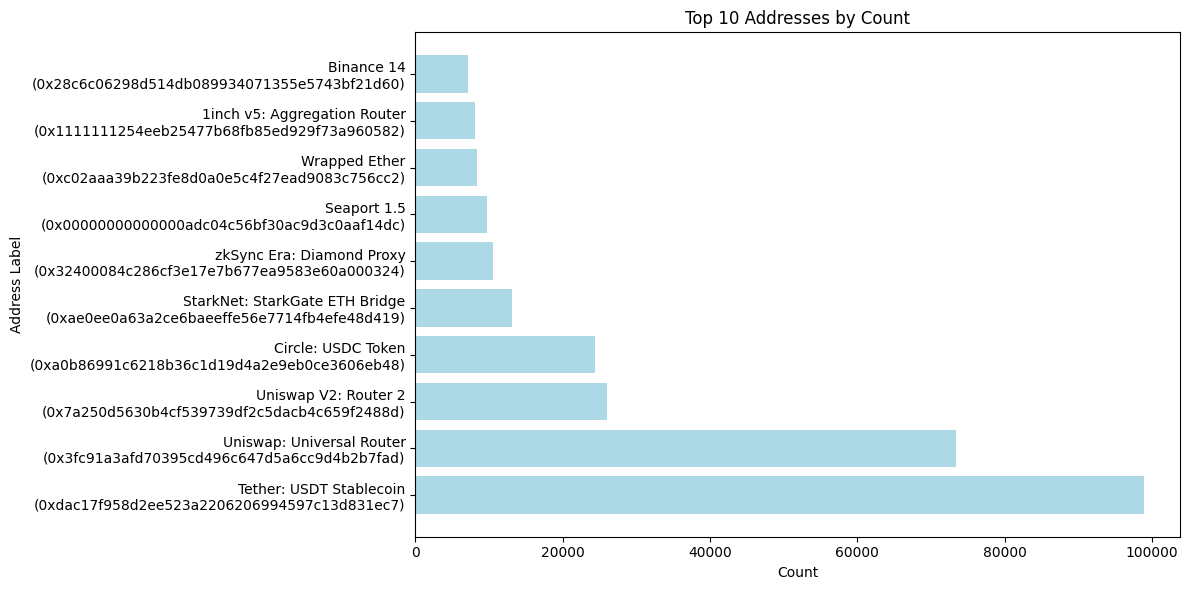